On génére des données de l'état d'un système est des observations de celui-ci à l'instant initiale jusqu'à un temps T.Puis on applique un filtre de Kalman et un lissage de Kalman à ces données.

Text(0.5, 1.0, 'Simulated data from a linear Gaussian state-space model')

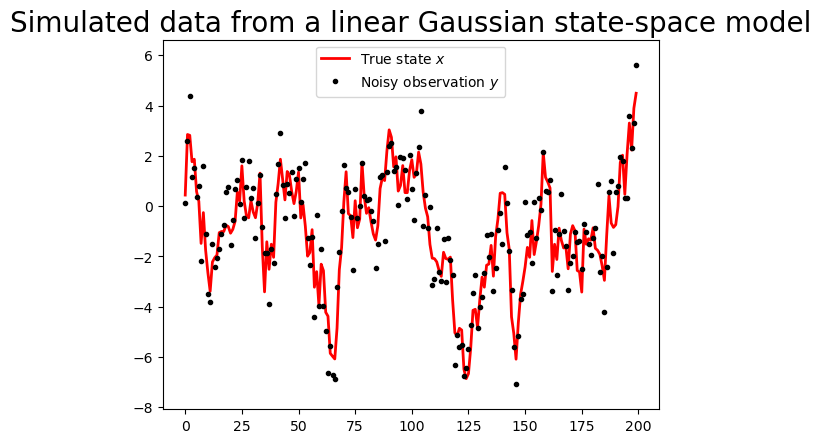

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

np.random.seed(5)
#Generate true state and noisy observation
T=200 # Nombre d'itérations
Q_true=1 # Matrice de covariance de eta (ici scalaire)
R_true=1 # Matrice de covariance de epsilon (ici scalaire)
x_true=np.zeros(T) # Vecteur de l'état du système à chaque instant t 
y=np.zeros(T) # Vecteur des observations à chaque instant t

for t in range(T):
    x_true[t]=0.95*x_true[t-1]+np.random.normal(0,Q_true)
    y[t]=x_true[t]+np.random.normal(0,R_true)

# Plot result
line1=plt.plot(range(T),x_true,'r',linewidth=2,label='True state $x$')
line2=plt.plot(range(T),y,'.k',label='Noisy observation $y$')
plt.legend()
plt.ylim(min(y)-1,max(y)+1)
plt.title('Simulated data from a linear Gaussian state-space model',fontsize=20)

Une fois les données générées nous allons appliquer un filtre de Kalman 

Text(0.5, 1.0, 'Results of the Kalman filter')

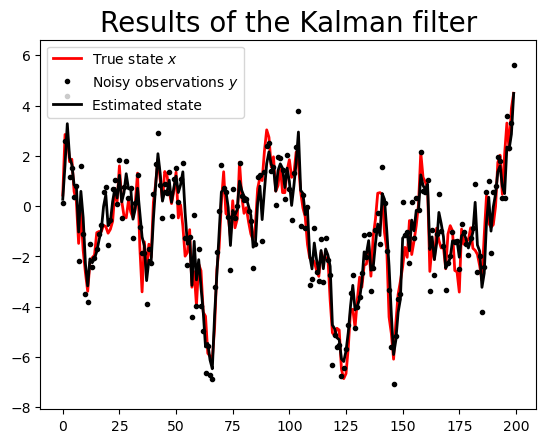

In [2]:
#Kalman Filter

# Calcul du temps pour réalisé le filtre et le lissage de Kalman
t1=time.time()

#Initial condition
xb=x_true[0]
B=1

# filter parameters
M=0.95
Q=Q_true
H=1
R=R_true

# Kalman filter (forward)
xf=np.zeros(T);Pf=np.zeros(T);xa=np.zeros(T);Pa=np.zeros(T)
for t in range(T):
    if t==0:
        xf[t]=xb
        Pf[t]=B
    else:
        xf[t]=M*xa[t-1]
        Pf[t]=M**2*Pa[t-1]+Q
    K=Pf[t]*H/(H**2*Pf[t]+R)
    xa[t]=xf[t]+K*(y[t]-H*xf[t])
    Pa[t]=(1-K*H)*Pf[t]

# Plot result
line1=plt.plot(range(T),x_true,'r',linewidth=2,label='True state $x$')
line2=plt.plot(range(T),y,'.k',label='Noisy observations $y$')
line3=plt.plot(range(T),xa,'k',linewidth=2,label='Estimated state')
plt.legend()
plt.ylim(min(y)-1,max(y)+1)
plt.title('Results of the Kalman filter',fontsize=20)

On applique maintenant un lissage de Kalman au données obtenues par le filtrage de Kalman


Text(0.5, 1.0, 'Results of the Kalman smoother')

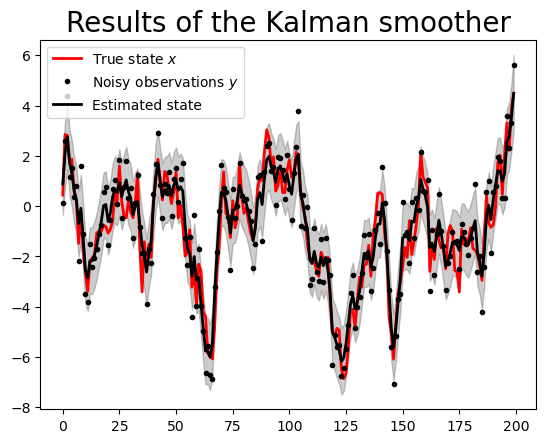

In [3]:
# Kalman Smoother
xs=np.zeros(T);Ps=np.zeros(T)
for t in range(T-1,-1,-1):
    if t==T-1:
        xs[t]=xa[t]
        Ps[t]=Pa[t]
    else:
        Ks=Pa[t]*M/Pf[t+1]
        xs[t]=xa[t]+Ks*(xs[t+1]-xf[t+1])
        Ps[t]=Pa[t]+Ks**2*(Ps[t+1]-Pf[t+1])

# Plot results
line1=plt.plot(range(T),x_true,'r',linewidth=2,label='True state $x$')
line2=plt.plot(range(T),y,'.k',label='Noisy observations $y$')
line3=plt.plot(range(T),xs,'k',linewidth=2,label='Estimated state')
plt.fill_between(range(T),xs-1.96*np.sqrt(Ps),xs+1.96*np.sqrt(Ps),color='k',alpha=.2)
plt.legend()
plt.ylim(min(y)-1,max(y)+1)
plt.title('Results of the Kalman smoother',fontsize=20)


In [4]:
t2=time.time()-t1
print("Temps d'éxecution du code:",t2,'s')

Temps d'éxecution du code: 0.9010508060455322 s
